In [22]:
# Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import csv
pd.set_option('display.max_rows', 1000)

In [2]:
# Create a path to the csv and read it into a Pandas DataFrame
#csv_path = "Assessor_Historical_Secured_Property_Tax_Rolls.csv"
csv_path = "Assessor_Historical_Secured_Property_Tax_Rolls (1).csv"

home_df = pd.read_csv(csv_path, encoding='utf8', engine='python')

home_df.head()

,Closed Roll Year,Property Location,Parcel Number,Block,Lot,Volume Number,Use Code,Use Definition,Property Class Code,Property Class Code Definition,...,Assessed Improvement Value,Assessed Land Value,Assessed Personal Property Value,Assessor Neighborhood District,Assessor Neighborhood Code,Assessor Neighborhood,Supervisor District,Analysis Neighborhood,the_geom,Row ID
0,2007.0,0000 0200 BRANNAN ST0436,3774412,3774,412,25,SRES,Single Family Residential,Z,Condominium,...,660074.0,660074.0,0.0,9.0,9H,South Beach,6,Financial District/South Beach,"(37.783600301443, -122.390711686202)",200701013774412
1,2016.0,0000 1207 INDIANA ST0004,4228041,4228,041,27,SRES,Single Family Residential,Z,Condominium,...,448902.0,448902.0,0.0,9.0,9E,Potrero Hill,10,Potrero Hill,"(37.75482032723, -122.390407823087)",201601014228041
2,2010.0,0000 0383 SITUS TO BE ASSIGNEDST0000,0041102,0041,102,1,COMR,Commercial Retail,C,Commercial Stores,...,643682.0,1396687.0,0.0,8.0,8D,North Beach,3,North Beach,"(37.805391366593, -122.413327689424)",201001010041102
3,2007.0,0000 0708 NORTH POINT STT 1,0024038,0024,038,1,SRES,Single Family Residential,Z,Condominium,...,365523.0,365523.0,0.0,8.0,8E,Russian Hill,2,Russian Hill,"(37.806098058572, -122.419076819471)",200701010024038
4,2016.0,0000 0188 MARY TERESA ST0000,5054A152,5054A,152,30,SRES,Single Family Residential,D,Dwelling,...,255843.0,383764.0,0.0,10.0,10K,Bayview Heights,10,Bayview Hunters Point,"(37.713888461234, -122.399170485325)",201601015054A152


In [3]:
home_df["Assessor Neighborhood"].value_counts()

Inner Mission                    73016
Central Sunset                   59401
Noe Valley                       58623
Excelsior                        56221
Parkside                         56196
Russian Hill                     55244
Central Richmond                 52306
Pacific Heights                  51103
Potrero Hill                     49147
South of Market                  47829
Outer Parkside                   47080
Bayview                          44827
Outer Sunset                     44103
Outer Richmond                   44008
Downtown                         43955
Yerba Buena                      43875
Inner Sunset                     41305
Van Ness/ Civic Center           40854
Eureka Valley/Dolores Heights    39898
Portola                          38865
Visitacion Valley                38721
South Beach                      36613
Mission Bay                      35269
Inner Richmond                   35153
Union Square                     31673
Croker Amazon            

In [4]:
neigh_gb = home_df.groupby(['Assessor Neighborhood','Closed Roll Year']).mean()
combined_df = neigh_gb.reset_index()

In [5]:
combined_df.keys()

Index(['Assessor Neighborhood', 'Closed Roll Year', 'Volume Number',
       'Year Property Built', 'Number of Bathrooms', 'Number of Bedrooms',
       'Number of Rooms', 'Number of Stories', 'Number of Units', 'Lot Depth',
       'Lot Frontage', 'Property Area', 'Basement Area', 'Lot Area',
       'Document Number 2', 'Tax Rate Area Code', 'Percent of Ownership',
       'Misc Exemption Value', 'Homeowner Exemption Value',
       'Assessed Fixtures Value', 'Assessed Improvement Value',
       'Assessed Land Value', 'Assessed Personal Property Value',
       'Assessor Neighborhood District', 'Supervisor District'],
      dtype='object')

In [6]:

combined_df = combined_df[['Assessor Neighborhood','Closed Roll Year','Assessed Land Value']]
combined_df["Pct Change"] = 0
#,'Closed Roll Year','Assessed Land Value'

In [7]:
combined_df

,Assessor Neighborhood,Closed Roll Year,Assessed Land Value,Pct Change
0,Alamo Square,2007.0,3.562759e+05,0
1,Alamo Square,2008.0,3.847017e+05,0
2,Alamo Square,2009.0,3.991533e+05,0
3,Alamo Square,2010.0,4.118134e+05,0
4,Alamo Square,2011.0,4.253846e+05,0
5,Alamo Square,2012.0,4.467023e+05,0
6,Alamo Square,2013.0,4.649209e+05,0
7,Alamo Square,2014.0,4.808897e+05,0
8,Alamo Square,2015.0,5.117352e+05,0
9,Alamo Square,2016.0,5.415907e+05,0


In [8]:
#combined.to_csv('combine.csv', sep=',', encoding='utf-8')

combined_df.to_csv('combine.csv', sep=',', encoding='utf-8')

In [10]:
prev_neigh = "Beginning"
prev_value = 0

for index, county in combined_df.iterrows():
    #print(f'{index}')
    if county['Assessor Neighborhood'] != prev_neigh:
        print(f"{county['Assessor Neighborhood']} {county['Assessed Land Value']} previous = {prev_neigh} 0" )
        prev_neigh = county['Assessor Neighborhood']
        prev_value = county['Assessed Land Value']
        combined_df.loc[index, "Pct Change"] = 0
    else:
        print(f"{county['Assessor Neighborhood']} {county['Assessed Land Value']} previous = {prev_neigh} {prev_value}" )     
        change_pct = ((county['Assessed Land Value'] - prev_value) / prev_value * 100)
        print(f"{int(county['Closed Roll Year'])}: {change_pct:.2f}%")
        combined_df.loc[index, "Pct Change"] = round(change_pct,2)
        prev_neigh = county['Assessor Neighborhood']
        prev_value = county['Assessed Land Value']

Alamo Square 356275.88019966724 previous = Beginning 0
Alamo Square 384701.68595041323 previous = Alamo Square 356275.88019966724
2008: 7.98%
Alamo Square 399153.25611745514 previous = Alamo Square 384701.68595041323
2009: 3.76%
Alamo Square 411813.4324324324 previous = Alamo Square 399153.25611745514
2010: 3.17%
Alamo Square 425384.557844691 previous = Alamo Square 411813.4324324324
2011: 3.30%
Alamo Square 446702.2627388535 previous = Alamo Square 425384.557844691
2012: 5.01%
Alamo Square 464920.92846034217 previous = Alamo Square 446702.2627388535
2013: 4.08%
Alamo Square 480889.71927162365 previous = Alamo Square 464920.92846034217
2014: 3.43%
Alamo Square 511735.1915535445 previous = Alamo Square 480889.71927162365
2015: 6.41%
Alamo Square 541590.723880597 previous = Alamo Square 511735.1915535445
2016: 5.83%
Anza Vista 249759.90945674045 previous = Alamo Square 0
Anza Vista 321615.8537074148 previous = Anza Vista 249759.90945674045
2008: 28.77%
Anza Vista 331171.11706349207 previ

Financial District South 1242563.1672308734 previous = Financial District South 1350745.088591184
2010: -8.01%
Financial District South 1270051.4114459872 previous = Financial District South 1242563.1672308734
2011: 2.21%
Financial District South 1381463.6529989834 previous = Financial District South 1270051.4114459872
2012: 8.77%
Financial District South 1416785.3879485442 previous = Financial District South 1381463.6529989834
2013: 2.56%
Financial District South 1617034.7325660123 previous = Financial District South 1416785.3879485442
2014: 14.13%
Financial District South 1492878.8292464116 previous = Financial District South 1617034.7325660123
2015: -7.68%
Financial District South 1470701.893851668 previous = Financial District South 1492878.8292464116
2016: -1.49%
Forest Hill 325625.2023233301 previous = Financial District South 0
Forest Hill 353934.7029126214 previous = Forest Hill 325625.2023233301
2008: 8.69%
Forest Hill 365838.6436222006 previous = Forest Hill 353934.7029126214

Lower Pacific Heights 467876.8123076923 previous = Lower Pacific Heights 464476.03886925796
2016: 0.73%
Marina 417058.44953789277 previous = Lower Pacific Heights 0
Marina 457094.15845588234 previous = Marina 417058.44953789277
2008: 9.60%
Marina 498067.8305830583 previous = Marina 457094.15845588234
2009: 8.96%
Marina 510889.51262349065 previous = Marina 498067.8305830583
2010: 2.57%
Marina 522087.52851434797 previous = Marina 510889.51262349065
2011: 2.19%
Marina 551994.8401310998 previous = Marina 522087.52851434797
2012: 5.73%
Marina 575636.1819164265 previous = Marina 551994.8401310998
2013: 4.28%
Marina 605052.6868940754 previous = Marina 575636.1819164265
2014: 5.11%
Marina 646166.9171724385 previous = Marina 605052.6868940754
2015: 6.80%
Marina 682746.0530222694 previous = Marina 646166.9171724385
2016: 5.66%
Merced Heights 145706.93756194253 previous = Marina 0
Merced Heights 153802.2418235877 previous = Merced Heights 145706.93756194253
2008: 5.56%
Merced Heights 156488.13379

Portola 155749.22276590264 previous = Portola 152173.85140355394
2009: 2.35%
Portola 156705.71274131275 previous = Portola 155749.22276590264
2010: 0.61%
Portola 167100.03887744594 previous = Portola 156705.71274131275
2011: 6.63%
Portola 173653.9358908342 previous = Portola 167100.03887744594
2012: 3.92%
Portola 177071.84744018523 previous = Portola 173653.9358908342
2013: 1.97%
Portola 189498.63615325277 previous = Portola 177071.84744018523
2014: 7.02%
Portola 206163.96710357236 previous = Portola 189498.63615325277
2015: 8.79%
Portola 219848.72456320658 previous = Portola 206163.96710357236
2016: 6.64%
Potrero Hill 266698.8692493947 previous = Portola 0
Potrero Hill 279777.89447983017 previous = Potrero Hill 266698.8692493947
2008: 4.90%
Potrero Hill 310853.94890355546 previous = Potrero Hill 279777.89447983017
2009: 11.11%
Potrero Hill 300785.5894992905 previous = Potrero Hill 310853.94890355546
2010: -3.24%
Potrero Hill 291831.7640016234 previous = Potrero Hill 300785.5894992905


Visitacion Valley 139737.33764553687 previous = Visitacion Valley 131492.66321779616
2008: 6.27%
Visitacion Valley 140164.0931372549 previous = Visitacion Valley 139737.33764553687
2009: 0.31%
Visitacion Valley 140067.0984241798 previous = Visitacion Valley 140164.0931372549
2010: -0.07%
Visitacion Valley 145537.00929032257 previous = Visitacion Valley 140067.0984241798
2011: 3.91%
Visitacion Valley 148580.23909114383 previous = Visitacion Valley 145537.00929032257
2012: 2.09%
Visitacion Valley 155854.1347792409 previous = Visitacion Valley 148580.23909114383
2013: 4.90%
Visitacion Valley 165360.86577181207 previous = Visitacion Valley 155854.1347792409
2014: 6.10%
Visitacion Valley 175324.84589571503 previous = Visitacion Valley 165360.86577181207
2015: 6.03%
Visitacion Valley 187287.20676303562 previous = Visitacion Valley 175324.84589571503
2016: 6.82%
West Portal 260392.23076923078 previous = Visitacion Valley 0
West Portal 278734.8713272543 previous = West Portal 260392.2307692307

In [11]:
combined_df['Closed Roll Year'] = combined_df['Closed Roll Year'].astype(int)
combined_df['Pct Change'] = combined_df['Pct Change'].astype(float)
combined_df

,Assessor Neighborhood,Closed Roll Year,Assessed Land Value,Pct Change
0,Alamo Square,2007,3.562759e+05,0.00
1,Alamo Square,2008,3.847017e+05,7.98
2,Alamo Square,2009,3.991533e+05,3.76
3,Alamo Square,2010,4.118134e+05,3.17
4,Alamo Square,2011,4.253846e+05,3.30
5,Alamo Square,2012,4.467023e+05,5.01
6,Alamo Square,2013,4.649209e+05,4.08
7,Alamo Square,2014,4.808897e+05,3.43
8,Alamo Square,2015,5.117352e+05,6.41
9,Alamo Square,2016,5.415907e+05,5.83


<Figure size 432x288 with 0 Axes>

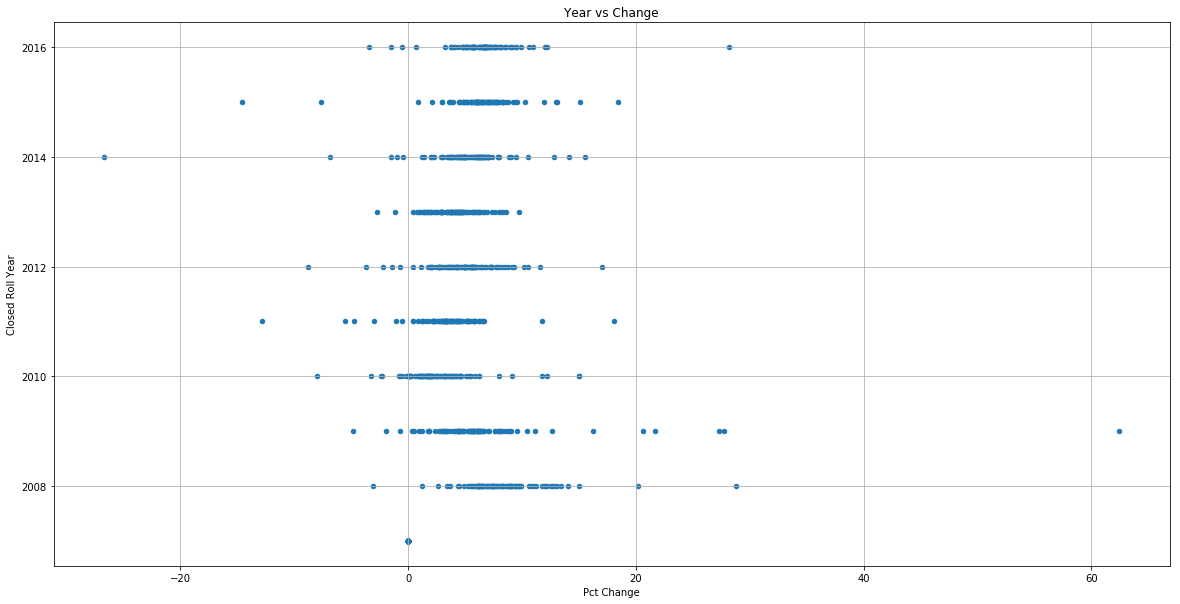

<Figure size 432x288 with 0 Axes>

In [42]:
N = 30
colors = np.random.rand(N)
 
# Create 
fig = plt.figure()
 
combined_df.plot(kind="scatter", x="Pct Change", y="Closed Roll Year",  grid=True, figsize=(20,10), title="Year vs Change")
plt.show()
plt.tight_layout()

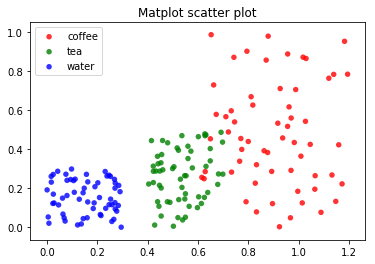

In [40]:
# Create data
import matplotlib.pyplot as plt
N = 60
g1 = (0.6 + 0.6 * np.random.rand(N), np.random.rand(N))
g2 = (0.4+0.3 * np.random.rand(N), 0.5*np.random.rand(N))
g3 = (0.3*np.random.rand(N),0.3*np.random.rand(N))
 
data = (g1, g2, g3)
colors = ("red", "green", "blue")
groups = ("coffee", "tea", "water") 
 
# Create plot
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
 
for data, color, group in zip(data, colors, groups):
    x, y = data
    ax.scatter(x, y, alpha=0.8, c=color, edgecolors='none', s=30, label=group)
 
plt.title('Matplot scatter plot')
plt.legend(loc=2)
plt.show()